- gene attribution distributions
- get genes with higher mean attributions
- plot distributions

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../..')

### analyze gene attribution distributions

First, model #16:

In [3]:
np.load('4.model/pred/proteins.npy', allow_pickle=True)

array(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c',
       'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7', 'CD105', 'CD49f', 'CD194',
       'CD4', 'CD44', 'CD14', 'CD16', 'CD25', 'CD45RO', 'CD279', 'TIGIT',
       'Mouse-IgG1', 'Mouse-IgG2a', 'Mouse-IgG2b', 'Rat-IgG2b', 'CD20',
       'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM', 'CD5', 'CD195',
       'CD32', 'CD196', 'CD185', 'CD103', 'CD69', 'CD62L', 'CD161',
       'CD152', 'CD223', 'KLRG1', 'CD27', 'CD107a', 'CD95', 'CD134',
       'HLA-DR', 'CD1c', 'CD11b', 'CD64', 'CD141', 'CD1d', 'CD314',
       'CD35', 'CD57', 'CD272', 'CD278', 'CD58', 'CD39', 'CX3CR1', 'CD24',
       'CD21', 'CD11a', 'CD79b', 'CD244', 'CD169', 'integrinB7', 'CD268',
       'CD42b', 'CD54', 'CD62P', 'CD119', 'TCR', 'Rat-IgG1', 'Rat-IgG2a',
       'CD192', 'CD122', 'FceRIa', 'CD41', 'CD137', 'CD163', 'CD83',
       'CD124', 'CD13', 'CD2', 'CD226', 'CD29', 'CD303', 'CD49b', 'C

In [4]:
lrz_path = '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj/'


In [5]:
# attr_all_22085_genes = pd.read_pickle('4.model/pred/attr_all_22085_genes_16_50_samples.pkl')
attr_all_22085_genes = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_16_50_samples.pkl')
attr_all_22085_genes = attr_all_22085_genes[0]   # CD9 for analysis
attr_all_22085_genes.shape

(350, 22085)

In [6]:
# Consider mean of absolute attributions
# First: consider all 22085 genes
abs_mean_attributions = np.mean(np.abs(attr_all_22085_genes), axis=0)

distribution = np.histogram(abs_mean_attributions, bins=10)

print("Distribution of absolute values of mean attributions per gene for all genes:")
for value, count in zip(distribution[1], distribution[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution[1][1], count))

Distribution of absolute values of mean attributions per gene for all genes:
Range: 0.00000 - 0.00192, Count: 19880
Range: 0.00191 - 0.00383, Count: 1925
Range: 0.00382 - 0.00574, Count: 212
Range: 0.00573 - 0.00765, Count: 47
Range: 0.00765 - 0.00956, Count: 11
Range: 0.00956 - 0.01147, Count: 4
Range: 0.01147 - 0.01338, Count: 2
Range: 0.01338 - 0.01529, Count: 1
Range: 0.01529 - 0.01720, Count: 2
Range: 0.01720 - 0.01911, Count: 1


In [7]:
# Now, consider 22001 default genes
genes_22001 = np.loadtxt('2.preprocess_to_feature/cite/all_22001_genes_names.txt', dtype=str)
abs_mean_attributions_default = np.mean(np.abs(np.array(attr_all_22085_genes)[:, :22001]), axis=0)

distribution_default = np.histogram(abs_mean_attributions_default, bins=distribution[1])

print("Distribution of absolute values of mean attributions per column of 22001 genes:")
for value, count in zip(distribution_default[1], distribution_default[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution_default[1][1], count))

# get top attributing genes
genes_higher_attr_default_idx = np.where(abs_mean_attributions_default >= 0.00766)[0]   # I chose this threshold to get genes in smaller bins
# print(genes_higher_attr_default_idx)
print('Top attributing genes:')
genes_higher_attr_default = genes_22001[genes_higher_attr_default_idx]
genes_higher_attr_default

Distribution of absolute values of mean attributions per column of 22001 genes:
Range: 0.00000 - 0.00192, Count: 19833
Range: 0.00191 - 0.00383, Count: 1894
Range: 0.00382 - 0.00574, Count: 212
Range: 0.00573 - 0.00765, Count: 45
Range: 0.00765 - 0.00956, Count: 9
Range: 0.00956 - 0.01147, Count: 4
Range: 0.01147 - 0.01338, Count: 2
Range: 0.01338 - 0.01529, Count: 1
Range: 0.01529 - 0.01720, Count: 1
Range: 0.01720 - 0.01911, Count: 0
Top attributing genes:


array(['ENSG00000236824_BCYRN1', 'ENSG00000105205_CLC',
       'ENSG00000105472_CLEC11A', 'ENSG00000077984_CST7',
       'ENSG00000170891_CYTL1', 'ENSG00000184897_H1FX',
       'ENSG00000244734_HBB', 'ENSG00000126264_HCST',
       'ENSG00000100097_LGALS1', 'ENSG00000005381_MPO',
       'ENSG00000125148_MT2A', 'ENSG00000245532_NEAT1',
       'ENSG00000183971_NPW', 'ENSG00000171848_RRM2',
       'ENSG00000124766_SOX4', 'ENSG00000122862_SRGN',
       'ENSG00000265972_TXNIP'], dtype='<U41')

In [8]:
# Now, consider 84 handselected genes
genes_handselected = np.loadtxt('2.preprocess_to_feature/cite/handselected_84_gene_ids.txt', dtype=str)
abs_mean_attributions_handselected = np.mean(np.abs(np.array(attr_all_22085_genes)[:, -84:]), axis=0)

distribution_handselected = np.histogram(abs_mean_attributions_handselected, bins=10)

print("Distribution of absolute values of mean attributions per handselected gene:")
for value, count in zip(distribution_handselected[1], distribution_handselected[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution_handselected[1][1], count))

# get top attributing genes
genes_higher_attr_handselected_idx = np.where(abs_mean_attributions_handselected >= 0.00386)[0]    # I chose this threshold to get genes in smaller bins
# print(genes_higher_attr_handselected_idx)
print('Top attributing genes:')
genes_higher_attr_handselected = [genes_handselected[idx] for idx in genes_higher_attr_handselected_idx]
genes_higher_attr_handselected

Distribution of absolute values of mean attributions per handselected gene:
Range: 0.00022 - 0.00234, Count: 56
Range: 0.00211 - 0.00423, Count: 22
Range: 0.00400 - 0.00611, Count: 1
Range: 0.00589 - 0.00800, Count: 2
Range: 0.00778 - 0.00989, Count: 1
Range: 0.00967 - 0.01178, Count: 0
Range: 0.01156 - 0.01367, Count: 0
Range: 0.01344 - 0.01556, Count: 0
Range: 0.01533 - 0.01745, Count: 1
Range: 0.01722 - 0.01933, Count: 1
Top attributing genes:


['ENSG00000135218_CD36',
 'ENSG00000117091_CD48',
 'ENSG00000114013_CD86',
 'ENSG00000010278_CD9',
 'ENSG00000128040_SPINK2',
 'ENSG00000072274_TFRC']

In [9]:
# print genes with mean attribution 0 if they exist
try:
    index_attr_0 = abs_mean_attributions_handselected.tolist().index(0)
    print(index_attr_0)    
    print('Gene with mean attribution 0: ', gene_ids[index_attr_0])
except:
    print('There is no gene with mean attribution 0.')

There is no gene with mean attribution 0.


#### analyze sorted mean abs. attribution for handselected and default genes
#### => values above/to the right of the elbow represent the genes with higher mean attributions

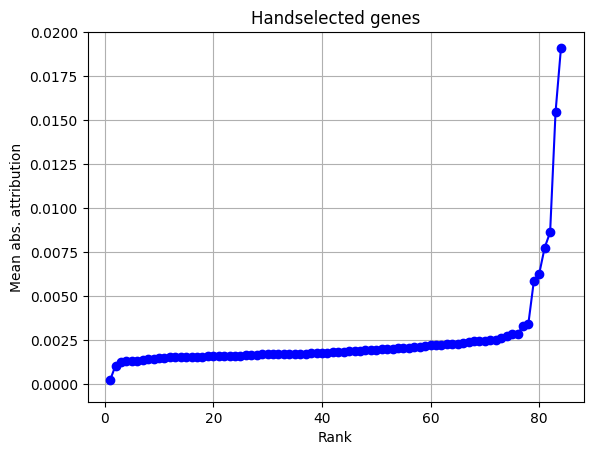

In [10]:
values = np.sort(abs_mean_attributions_handselected)
ranks = np.arange(1, len(values) + 1)

plt.plot(ranks, values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rank')
plt.ylabel('Mean abs. attribution')
plt.title('Handselected genes')
plt.grid(True)
plt.ylim(-0.001, 0.02)  # for same y-axis scale as handselected
plt.show()

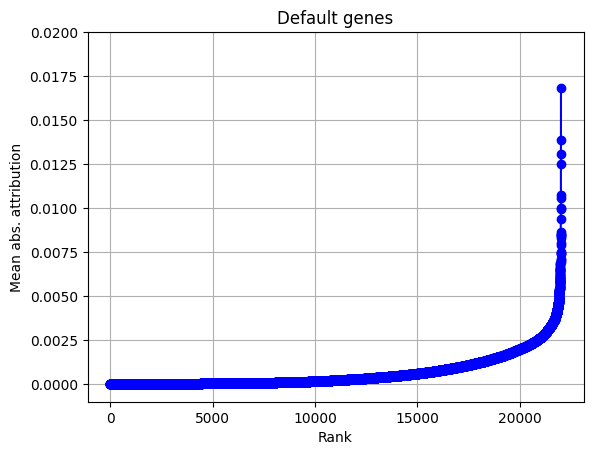

In [11]:
values = np.sort(abs_mean_attributions_default)
ranks = np.arange(1, len(values) + 1)

plt.plot(ranks, values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rank')
plt.ylabel('Mean abs. attribution')
plt.title('Default genes')
plt.grid(True)
plt.ylim(-0.001, 0.02)  # for same y-axis scale as handselected
plt.show()

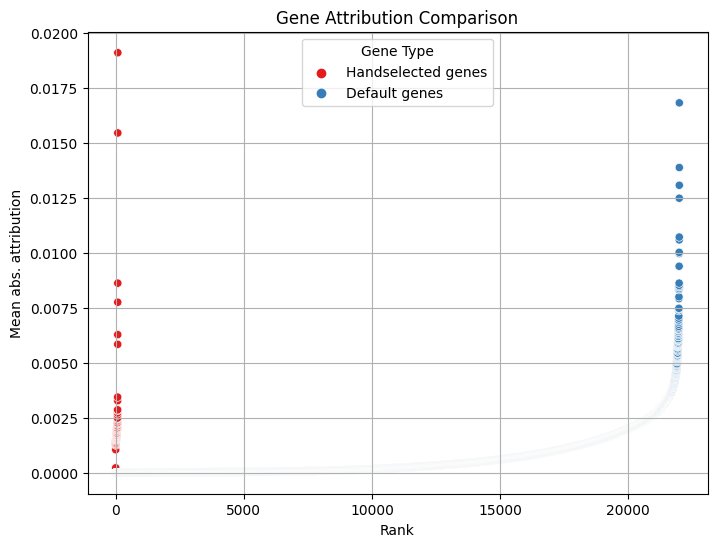

In [17]:
#  plot these in one plot: seaborn scatterplot hue
# TODO x axis scale???

# Create a DataFrame for the data
handselected = pd.DataFrame({
    'Rank': np.arange(1, len(abs_mean_attributions_handselected) + 1),
    'Mean abs. attribution': np.sort(abs_mean_attributions_handselected),
    'Gene Type': 'Handselected genes'
})

# Append data for default genes
default = pd.DataFrame({
    'Rank': np.arange(1, len(abs_mean_attributions_default) + 1),
    'Mean abs. attribution': np.sort(abs_mean_attributions_default),
    'Gene Type': 'Default genes'
})

data = pd.concat([handselected, default])

# Plot the data using Seaborn scatterplot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.scatterplot(data=data, x='Rank', y='Mean abs. attribution', hue='Gene Type', marker='o', linestyle='-', palette='Set1')
plt.xlabel('Rank')
plt.ylabel('Mean abs. attribution')
plt.title('Gene Attribution Comparison')
plt.grid(True)
plt.show()


In [18]:
# check if the genes with higher mean attribution are among the top 20 features shown in shap plot
top_20_feature_names_shap = np.load('4.model/pred/top_feature_names_16_p.npy', allow_pickle=True)

print('Handselected genes:')
for i in genes_higher_attr_handselected:
    print(i, i in top_20_feature_names_shap)  # AVP, CD48, CD86, TFRC, and SPINK2 are not among top 20
    
print('Default genes:')
for i in genes_higher_attr_default:
    print(i, i in top_20_feature_names_shap)  # HBG2, MYC, USP15 not among top20

In [19]:
# compute gini index of mean attributions and include in plot below
def gini(arr):    # range from 0 (total equality) to 1 (absolute inequality)
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

print(gini(abs_mean_attributions_handselected))
print(gini(abs_mean_attributions_default))


# TODO put plots into one with same y-axis scale

0.3232057659812779
0.6643587094273422


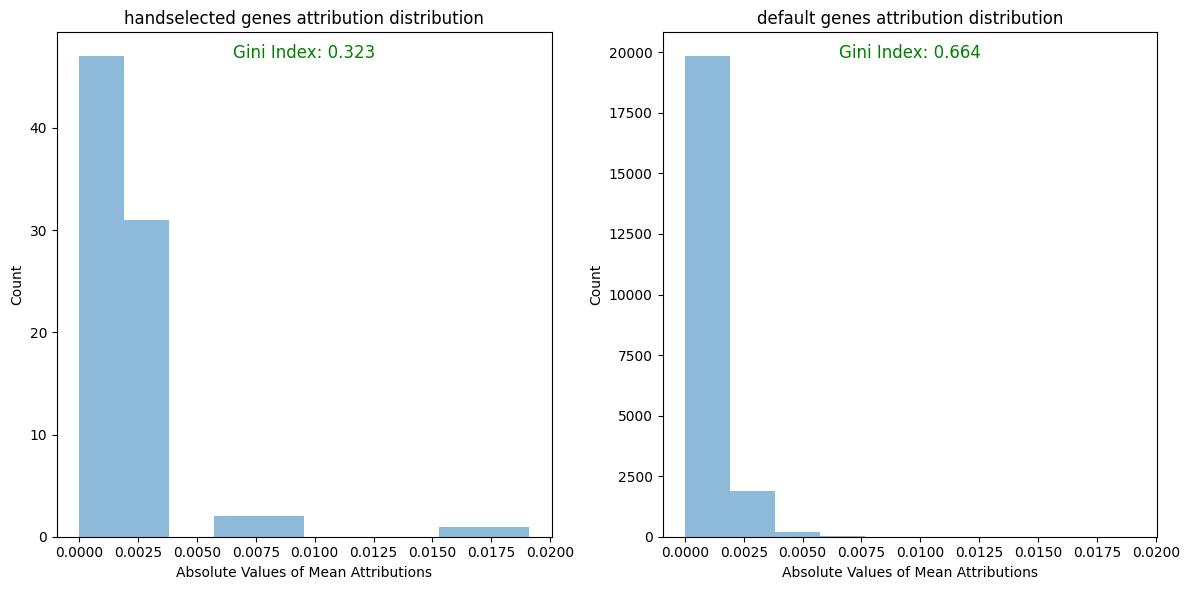

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(abs_mean_attributions_handselected, bins=distribution[1], alpha=0.5)  # bins=distribution[1]  # bins=log_bins
# ax1.set_xscale('log')
ax1.text(0.5, 0.95, f'Gini Index: {gini(abs_mean_attributions_handselected):.3f}', transform=ax1.transAxes, ha='center', color='green', fontsize=12)

ax1.set_xlabel('Absolute Values of Mean Attributions')
ax1.set_ylabel('Count')
ax1.set_title('handselected genes attribution distribution')

ax2.hist(abs_mean_attributions_default, bins=distribution[1], alpha=0.5)
# ax2.set_xscale('log')
ax2.text(0.5, 0.95, f'Gini Index: {gini(abs_mean_attributions_default):.3f}', transform=ax2.transAxes, ha='center', color='green', fontsize=12)

ax2.set_xlabel('Absolute Values of Mean Attributions')
ax2.set_ylabel('Count')
ax2.set_title('default genes attribution distribution')

plt.tight_layout()
plt.show()

(0.0, 20824.65)


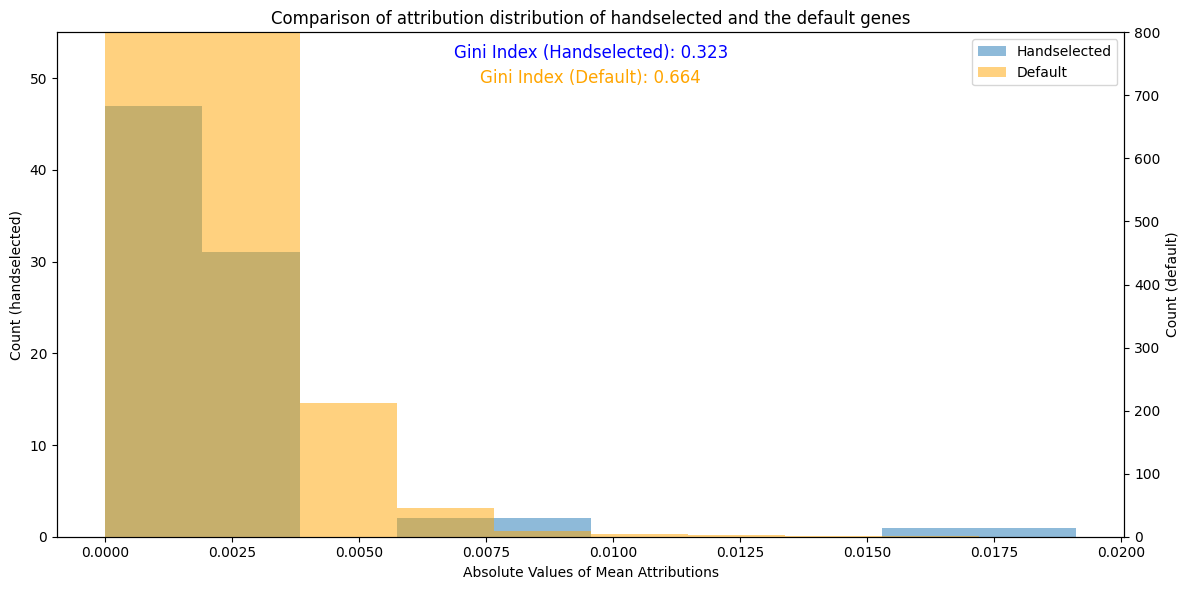

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(abs_mean_attributions_handselected, bins=distribution[1], alpha=0.5, label='Handselected')
ax.set_xlabel('Absolute Values of Mean Attributions')
ax.set_ylabel('Count (handselected)')
ax.set_title('Comparison of attribution distribution of handselected and the default genes')

# Create a twin axis for the second histogram
ax2 = ax.twinx()

ax2.hist(abs_mean_attributions_default, bins=distribution[1], alpha=0.5, color='orange', label='Default')
ax2.set_ylabel('Count (default)')

# Adjust the y-axis limits of the twin Axes to match the primary Axes
# ax.set_ylim(ax2.get_ylim())
print(ax2.get_ylim())
ax.set_ylim((0,55))
ax2.set_ylim((0,800))

# Add legend
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper right')

# Add Gini index labels
ax.text(0.5, 0.95, f'Gini Index (Handselected): {gini(abs_mean_attributions_handselected):.3f}', transform=ax.transAxes, ha='center', color='blue', fontsize=12)
ax2.text(0.5, 0.90, f'Gini Index (Default): {gini(abs_mean_attributions_default):.3f}', transform=ax2.transAxes, ha='center', color='orange', fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [22]:
# TODO same density for both plots (same area of histograms) -> adjusts y-axes

### same for model 17:

In [29]:
attr_all_22085_genes = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_17_50_samples.pkl')
attr_all_22085_genes = attr_all_22085_genes[0]   # CD9 for analysis
attr_all_22085_genes.shape

(350, 22085)

In [30]:
# Consider mean of absolute attributions
# First: consider all 22085 genes
abs_mean_attributions = np.mean(np.abs(attr_all_22085_genes), axis=0)

distribution = np.histogram(abs_mean_attributions, bins=10)

print("Distribution of absolute values of mean attributions per gene for all genes:")
for value, count in zip(distribution[1], distribution[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution[1][1], count))

Distribution of absolute values of mean attributions per gene for all genes:
Range: 0.00000 - 0.00255, Count: 20640
Range: 0.00255 - 0.00510, Count: 1339
Range: 0.00510 - 0.00765, Count: 86
Range: 0.00765 - 0.01020, Count: 14
Range: 0.01020 - 0.01275, Count: 5
Range: 0.01275 - 0.01530, Count: 0
Range: 0.01530 - 0.01785, Count: 0
Range: 0.01785 - 0.02040, Count: 0
Range: 0.02040 - 0.02295, Count: 0
Range: 0.02295 - 0.02550, Count: 1


In [31]:
# Now, consider 22001 non-handselected genes
genes_22001 = np.loadtxt('2.preprocess_to_feature/cite/all_22001_genes_names.txt', dtype=str)
abs_mean_attributions_default = np.mean(np.abs(np.array(attr_all_22085_genes)[:, :22001]), axis=0)

distribution_default = np.histogram(abs_mean_attributions_default, bins=distribution[1])

print("Distribution of absolute values of mean attributions per column of 22001 genes:")
for value, count in zip(distribution_default[1], distribution_default[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution_default[1][1], count))

# get top attributing genes
genes_higher_attr_default_idx = np.where(abs_mean_attributions_default >= 0.00766)[0]   # I chose this threshold to get genes in smaller bins
# print(genes_higher_attr_default_idx)
print('Top attributing genes:')
genes_higher_attr_default = genes_22001[genes_higher_attr_default_idx]
genes_higher_attr_default

Distribution of absolute values of mean attributions per column of 22001 genes:
Range: 0.00000 - 0.00255, Count: 20619
Range: 0.00255 - 0.00510, Count: 1283
Range: 0.00510 - 0.00765, Count: 83
Range: 0.00765 - 0.01020, Count: 13
Range: 0.01020 - 0.01275, Count: 3
Range: 0.01275 - 0.01530, Count: 0
Range: 0.01530 - 0.01785, Count: 0
Range: 0.01785 - 0.02040, Count: 0
Range: 0.02040 - 0.02295, Count: 0
Range: 0.02295 - 0.02550, Count: 0
Top attributing genes:


array(['ENSG00000101745_ANKRD12', 'ENSG00000105205_CLC',
       'ENSG00000105472_CLEC11A', 'ENSG00000077984_CST7',
       'ENSG00000184897_H1FX', 'ENSG00000196565_HBG2',
       'ENSG00000100097_LGALS1', 'ENSG00000005381_MPO',
       'ENSG00000125148_MT2A', 'ENSG00000136997_MYC',
       'ENSG00000245532_NEAT1', 'ENSG00000183971_NPW',
       'ENSG00000124766_SOX4', 'ENSG00000122862_SRGN',
       'ENSG00000265972_TXNIP', 'ENSG00000135655_USP15'], dtype='<U41')

In [32]:
# Now, consider 84 handselected genes
genes_handselected = np.loadtxt('2.preprocess_to_feature/cite/handselected_84_gene_ids.txt', dtype=str)
abs_mean_attributions_handselected = np.mean(np.abs(np.array(attr_all_22085_genes)[:, -84:]), axis=0)

distribution_handselected = np.histogram(abs_mean_attributions_handselected, bins=10)

print("Distribution of absolute values of mean attributions per handselected gene:")
for value, count in zip(distribution_handselected[1], distribution_handselected[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution_handselected[1][1], count))

# get top attributing genes
genes_higher_attr_handselected_idx = np.where(abs_mean_attributions_handselected >= 0.00516)[0]    # I chose this threshold to get genes in smaller bins
# print(genes_higher_attr_handselected_idx)
print('Top attributing genes:')
genes_higher_attr_handselected = [genes_handselected[idx] for idx in genes_higher_attr_handselected_idx]
genes_higher_attr_handselected

Distribution of absolute values of mean attributions per handselected gene:
Range: 0.00008 - 0.00270, Count: 27
Range: 0.00262 - 0.00524, Count: 50
Range: 0.00516 - 0.00778, Count: 3
Range: 0.00770 - 0.01033, Count: 1
Range: 0.01025 - 0.01287, Count: 2
Range: 0.01279 - 0.01541, Count: 0
Range: 0.01533 - 0.01795, Count: 0
Range: 0.01787 - 0.02049, Count: 0
Range: 0.02041 - 0.02304, Count: 0
Range: 0.02296 - 0.02558, Count: 1
Top attributing genes:


['ENSG00000101200_AVP',
 'ENSG00000135218_CD36',
 'ENSG00000117091_CD48',
 'ENSG00000114013_CD86',
 'ENSG00000010278_CD9',
 'ENSG00000128040_SPINK2',
 'ENSG00000072274_TFRC']

In [33]:
# print genes with mean attribution 0 if they exist
try:
    index_attr_0 = abs_mean_attributions_handselected.tolist().index(0)
    print(index_attr_0)    
    print('Gene with mean attribution 0: ', gene_ids[index_attr_0])
except:
    print('There is no gene with mean attribution 0.')

There is no gene with mean attribution 0.


#### analyze sorted mean abs. attribution for handselected and default genes
#### => values above/to the right of the elbow represent the genes with higher mean attributions

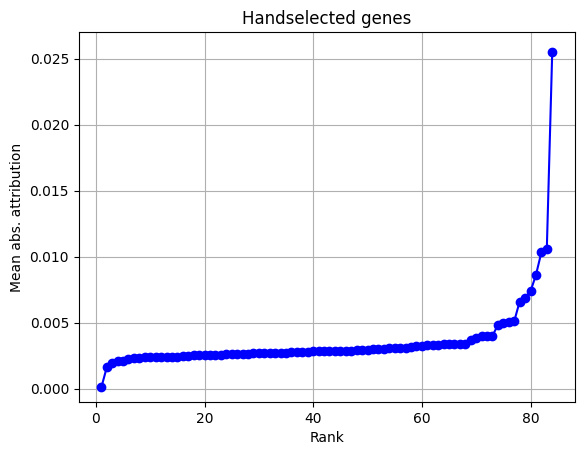

In [34]:
values = np.sort(abs_mean_attributions_handselected)
ranks = np.arange(1, len(values) + 1)

plt.plot(ranks, values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rank')
plt.ylabel('Mean abs. attribution')
plt.title('Handselected genes')
plt.grid(True)
plt.ylim(-0.001, 0.027)  # for same y-axis scale as handselected
plt.show()

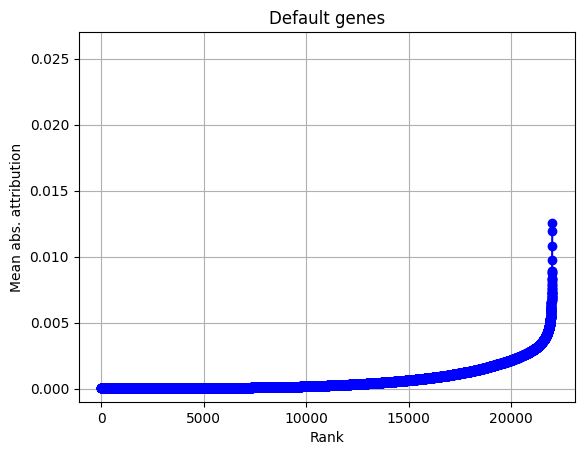

In [35]:
values = np.sort(abs_mean_attributions_default)
ranks = np.arange(1, len(values) + 1)

plt.plot(ranks, values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rank')
plt.ylabel('Mean abs. attribution')
plt.title('Default genes')
plt.grid(True)
plt.ylim(-0.001, 0.027)  # for same y-axis scale as handselected
plt.show()

In [26]:
# TODO plot these in one plot: seaborn scatterplot hue

In [36]:
# check if the genes with higher mean attribution are among the top 20 features shown in shap plot
top_20_feature_names_shap_17 = np.load('4.model/pred/top_feature_names_17_p.npy', allow_pickle=True)

print('Handselected genes:')
for i in genes_higher_attr_handselected:
    print(i, i in top_20_feature_names_shap_17)  # AVP, CD86, CD9, SPINK2, TFRC are not among top 20
    
print('Default genes:')
for i in genes_higher_attr_default:
    print(i, i in top_20_feature_names_shap_17)  # MPO, MYC, NEAT1 not among top 20

Handselected genes:
ENSG00000101200_AVP False
ENSG00000135218_CD36 True
ENSG00000117091_CD48 True
ENSG00000114013_CD86 False
ENSG00000010278_CD9 False
ENSG00000128040_SPINK2 False
ENSG00000072274_TFRC False
Default genes:
ENSG00000101745_ANKRD12 True
ENSG00000105205_CLC True
ENSG00000105472_CLEC11A True
ENSG00000077984_CST7 True
ENSG00000184897_H1FX True
ENSG00000196565_HBG2 True
ENSG00000100097_LGALS1 True
ENSG00000005381_MPO False
ENSG00000125148_MT2A True
ENSG00000136997_MYC False
ENSG00000245532_NEAT1 False
ENSG00000183971_NPW True
ENSG00000124766_SOX4 True
ENSG00000122862_SRGN True
ENSG00000265972_TXNIP True
ENSG00000135655_USP15 True


In [37]:
# compute gini index of mean attributions and include in plot below
print(gini(abs_mean_attributions_handselected))
print(gini(abs_mean_attributions_default))


# TODO put plots into one with same y-axis scale

0.2612715797796996
0.667923014662344


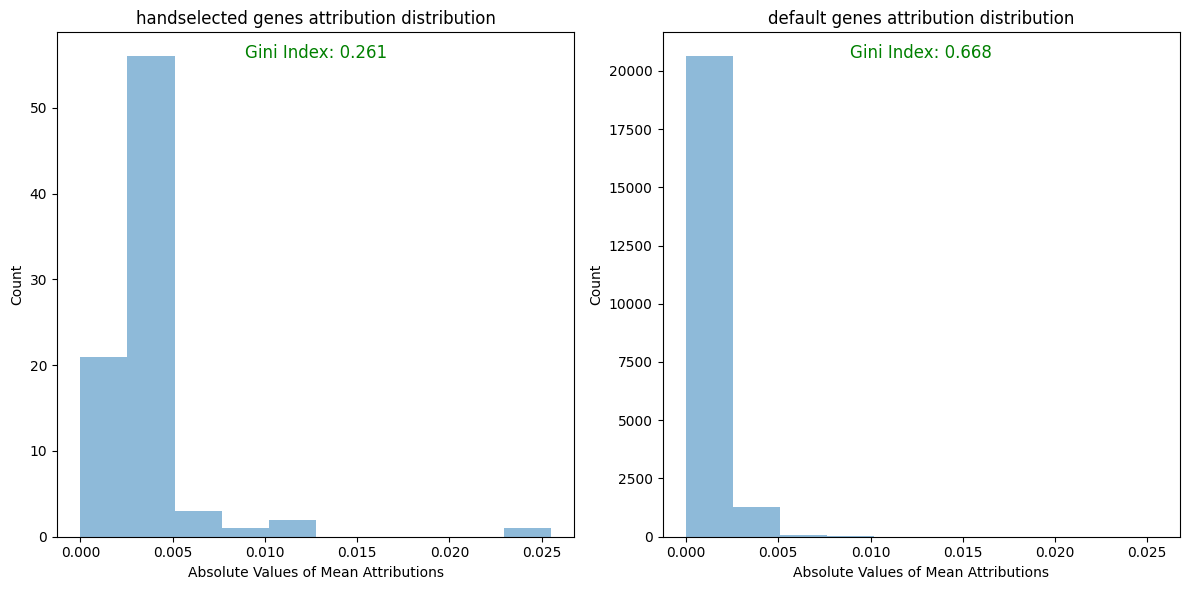

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(abs_mean_attributions_handselected, bins=distribution[1], alpha=0.5)  # bins=distribution[1]  # bins=log_bins
# ax1.set_xscale('log')
ax1.text(0.5, 0.95, f'Gini Index: {gini(abs_mean_attributions_handselected):.3f}', transform=ax1.transAxes, ha='center', color='green', fontsize=12)

ax1.set_xlabel('Absolute Values of Mean Attributions')
ax1.set_ylabel('Count')
ax1.set_title('handselected genes attribution distribution')

ax2.hist(abs_mean_attributions_default, bins=distribution[1], alpha=0.5)
# ax2.set_xscale('log')
ax2.text(0.5, 0.95, f'Gini Index: {gini(abs_mean_attributions_default):.3f}', transform=ax2.transAxes, ha='center', color='green', fontsize=12)

ax2.set_xlabel('Absolute Values of Mean Attributions')
ax2.set_ylabel('Count')
ax2.set_title('default genes attribution distribution')

plt.tight_layout()
plt.show()

(0.0, 21649.95)


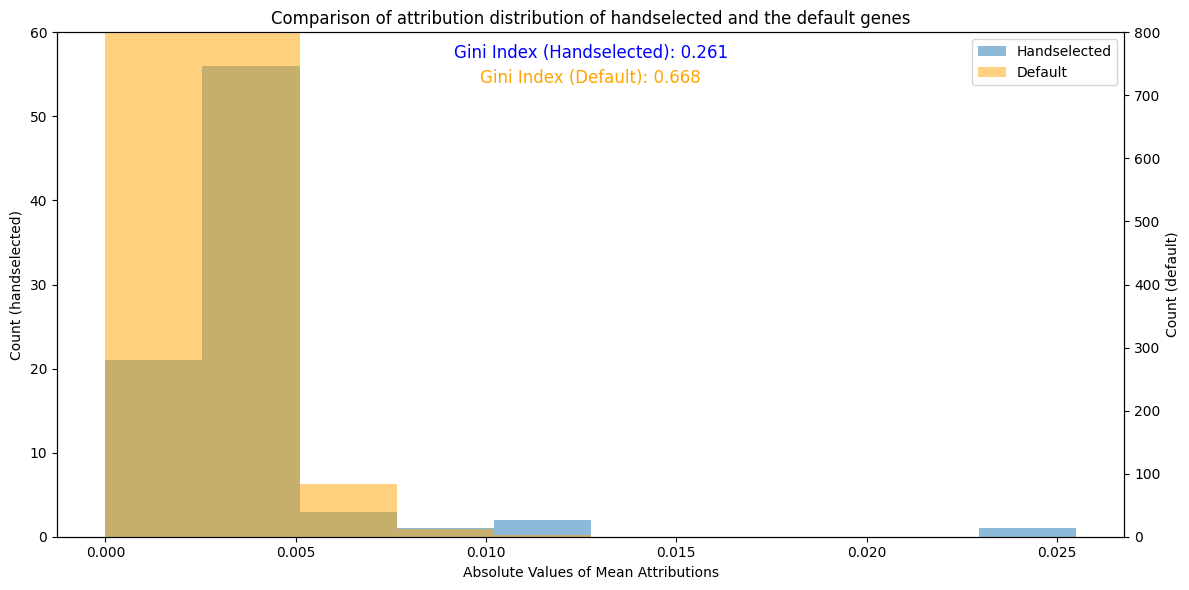

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(abs_mean_attributions_handselected, bins=distribution[1], alpha=0.5, label='Handselected')
ax.set_xlabel('Absolute Values of Mean Attributions')
ax.set_ylabel('Count (handselected)')
ax.set_title('Comparison of attribution distribution of handselected and the default genes')

# Create a twin axis for the second histogram
ax2 = ax.twinx()

ax2.hist(abs_mean_attributions_default, bins=distribution[1], alpha=0.5, color='orange', label='Default')
ax2.set_ylabel('Count (default)')

# Adjust the y-axis limits of the twin Axes to match the primary Axes
# ax.set_ylim(ax2.get_ylim())
print(ax2.get_ylim())
ax.set_ylim((0,60))
ax2.set_ylim((0,800))

# Add legend
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper right')

# Add Gini index labels
ax.text(0.5, 0.95, f'Gini Index (Handselected): {gini(abs_mean_attributions_handselected):.3f}', transform=ax.transAxes, ha='center', color='blue', fontsize=12)
ax2.text(0.5, 0.90, f'Gini Index (Default): {gini(abs_mean_attributions_default):.3f}', transform=ax2.transAxes, ha='center', color='orange', fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()